In [1]:
## Documentation on how to generate paper figures 

In [2]:
import os
bmidir = os.environ['BMI_DYN']
os.chdir(bmidir)

In [3]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import analysis_config

#### Pre-requisites

In [ ]:
##### Monkey J pre-processing #### 
from resim_ppf import file_key
task_filelist = analysis_config.data_params['jeev_input_type']

### Neural push for Monkey J:
file_key.surajs_sim_with_task_data(filelist=task_filelist, save_neural_push_fn=None)

### Approximate SSKG from PPF for monkey J: 
file_key.make_sskg_ppf(filelist=task_filelist, save_KG_fn = None)


In [ ]:
### Make magnitude thresholds for commands -- both animals #### 
from online_analysis import co_obs_tuning_matrices
fname, bounds = co_obs_tuning_matrices.extract_radial_bin_edges_grom_jeev(make_last_bin_95th = True)

In [ ]:
### Train dynamics models
from online_analysis import generate_models

### Place model in "generate_models_list.py" and assign it a model number 
### Model name includes wnumber of timesteps of history, include other variables, 
### include/condition on command, include dynamcis (back and forward)

### See generate_models_list.py, lines 6 - 23 for code 
model_set_number = 100

### STEP 1: Select ridge parameter: 
### Regular ridge model: 
generate_models. sweep_alpha_all(run_alphas=True, model_set_number = model_set_number)

### can also sweep dimensionality -- slds or lds 
# generate_modes.sweep_dim_all

### STEP 2: Fit the model
generate_models.model_individual_cell_tuning_curves(hdf_filename='_models_to_pred_mn_diffs', # HDF name
    animal='grom', # animal 
    n_folds = 5, # number of folds (default=5)
    norm_neur = False, # Z-score units (default=False)
    normalize_ridge_vars = False, # only done for ridge in supp fig 5 since pos/velocity/target/etc. were all different untis 
    return_models = True, # Save out model
    model_set_number = model_set_number,
    ndays = None, # How many days to fit -- if testing usually set to 2; 
    include_null_pot = False, # Make predictions of null and potent components separately 
    only_potent_predictor = False, # Only use potent part of the spikes to train (N-dim)
    only_command = False, # Similar to "only_potent_predictor" but in 2D space instead of N-d space
    fit_intercept = True, # Fit intercept with Ridge model 

    fit_task_specific_model_test_task_spec = False, #leftover from sept 2019 -- fit on task specific data / test on it 
    fit_task_spec_and_general = False,# fit on task spec data and general data and use models to reconstruct all data; 
    match_task_spec_n = False, # Match amt of training data b/w tasks 
    fit_condition_spec_no_general = False, # fit data on condition specific data, reconstruct all data.

    full_shuffle = False, # deprecated 
    within_bin_shuffle = False, # fit on data that's been shuffled within command-bin
    shuff_id = 0, # shuffle ID -- used for saving filename 
    add_model_to_datafile = True, # add model to datafile 
    task_demean = False, # demean the task data (to account for task-spec mean diffs)
    gen_demean = False, # demean all data 
    alpha_always_zero = False, # set alpha to zero 
    latent_dim = 'full',# if LDS model w/ latent state -- latent_dim ('full' used in fit_LDS)
    keep_bin_spk_zsc = False, # only for homer data
    null_predictor = False, # predict null using regular model alpha 
    null_predictor_w_null_alpha = False, # predict null using null-specific alpha 

    LDS_skip_task_specific = True, # specific for model 11 
    window_size_LDS = 'full') # how long to use for LDS predictions? 

### Model_set_number 6: only dynamics conditioned on command vs. only dynamics 
### Model_set_number 11: LDS dynamics w/ latent state 
### Model_set_number 12: all behavior variables vs. behavior variables w/ dynamics (Fig. S5)
### Model_set_number 13: RSLDS (rebuttal), Fig. S4

#### Example model: 
for animal in ['grom', 'jeev']:
    generate_models.model_individual_cell_tuning_curves(model_set_number = 6, animal=animal, 
                                                    fit_task_spec_and_general=True, match_task_spec_n = True,
                                                    add_model_to_datafile = False)

#### STEP 3: generate the shuffle model: 
### Example: 
generate_models.sweep_alpha_all(run_alphas=True, model_set_number=6, 
                                within_bin_shuffle=True, keep_bin_spk_zsc = False)

generate_models.model_ind_cell_tuning_SHUFFLE(nshuffs=20, shuff_type = 'beh_maint', keep_bin_spk_zsc = False)

#### Figure 1

In [2]:
# AB -- cartoon

In [10]:
# C -- Monkey G, Day 0; 
from online_analysis import basic_perf_analysis
import analysis_config

### Some subset of OBS trials not shown; 
day = 0
basic_perf_analysis.example_tarj([analysis_config.data_params['grom_input_type'][day]])

In [11]:
# D -- Time to target 
from online_analysis import generate_models_utils
generate_models_utils.plot_t2t()

In [6]:
# E -- Example command -- from Vivek 

In [2]:
# F -- command subtrajectory plot 
from online_analysis import plot_fr_diffs
plot_fr_diffs.eg_command_PSTH()

# Position subtrajectory -- from vivek 

#### Fig S1

In [12]:
# A -- cartoon

In [14]:
# B -- # commands / condition 
plot_fr_diffs.plot_distribution_of_nmov_per_command()

Mov 14.1, # Iters 0 to match global
Mov 1.0, # Iters 0 to match global
Mov 2.0, # Iters 0 to match global
Mov 3.0, # Iters 0 to match global
Mov 12.1, # Iters 0 to match global
Mov 10.1, # Iters 0 to match global
Mov 11.1, # Iters 0 to match global
Mov 15.0, # Iters 0 to match global
Mov 13.1, # Iters 0 to match global
OSA: mov 10.1, pt = 3.301
OSA: mov 1.0, pt = 2.173
OSA: mov 11.1, pt = 3.621
OSA: mov 2.0, pt = 1.688
OSA: mov 12.1, pt = 2.374
OSA: mov 3.0, pt = 1.597
OSA: mov 13.1, pt = 2.334
OSA: mov 14.1, pt = 2.954
OSA: mov 15.0, pt = 3.555


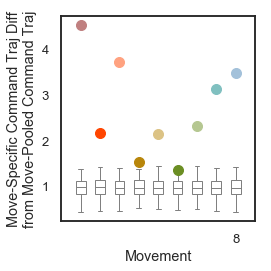

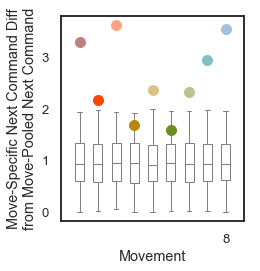

In [16]:
# C -- repeated from Fig 1
# D/E LEFT -- example bheavioral diference 
plot_fr_diffs.plot_example_beh_comm(save=False, center_by_global = True)

# D/E Center and Right -- fraction deviation from condition-pool and distribution of 
# subtrajectory distances (for sig. command / cond)
plot_fr_diffs.plot_perc_command_beh_sig_diff_than_global(nshuffs=1000,
                                                        use_saved_move_command_sig = False)

#### Fig 3 and S2

In [17]:
## A -- cartoon

In [19]:
## B -- Example neuron 36 and population distance; Position sub-trajectory repeated from Fig 1; 
plot_fr_diffs.plot_example_neuron_comm(save=False)

In [4]:
## C -- population distance distribution 
### Get out pooled stats 
ps, psv, nit, pooled_stats = plot_fr_diffs.perc_neuron_command_move_sig(nshuffs=1000, keep_bin_spk_zsc=False)
plot_fr_diffs.plot_su_pop_stats(ps, psv)

online_analysis/plot_fr_diffs.py:1662: RuntimeWarning: invalid value encountered in double_scalars
  zsc = (dmean_FR[i_neur] - np.mean(dmFR_shuffle[:, i_neur])) / np.std(dmFR_shuffle[:, i_neur])
online_analysis/plot_fr_diffs.py:1672: RuntimeWarning: invalid value encountered in double_scalars
  dFR/global_mean_FR[i_neur], global_mean_FR[i_neur], zsc), dtype=dtype_su))
online_analysis/plot_fr_diffs.py:1662: RuntimeWarning: divide by zero encountered in double_scalars
  zsc = (dmean_FR[i_neur] - np.mean(dmFR_shuffle[:, i_neur])) / np.std(dmFR_shuffle[:, i_neur])


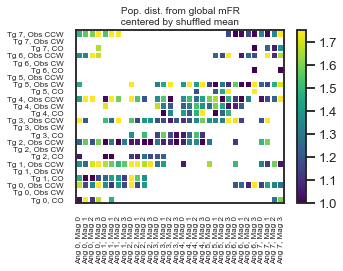

In [5]:
## D / E 
_ = plot_fr_diffs.plot_pooled_stats_fig3_science_compression(pooled_stats)

### Stats pooled: 
plot_fr_diffs.print_pooled_stats_fig3(pooled_stats)

## Fig S2A: 
# repeat Fig 2 B right 
dat = pooled_stats['grom', 0]

### Populate with true distances ####
x = plot_fr_diffs.populate_matrix(dat)
f = plot_fr_diffs.plot_x(x, vmin = 1.0, vmax=1.75, title='Pop. dist. from global mFR\n centered by shuffled mean ')


## Fig S2 BC: 
plot_fr_diffs.plot_su_pop_stats(ps, psv)

#### Fig 4

In [6]:
# AB -- cartoons

In [23]:
# C -- R2 
from online_analysis import generalization_plots

## Gather the data inot "save_dict"
save_dict = {}
for cat in ['com', 'mov']:
    save_dict = generalization_plots.plot_dyn_const_r2(cat=cat, nshuffs = 1000,
            model_nm = 'hist_1pos_0psh_2spksm_1_spksp_0', 
                                                         return_trans_from_lo=False, 
                                                         save_dict = save_dict,
                                                         apply_full_axes_to_all = True) # full dimensionality
    other_color = analysis_config.blue_rgb

### Plot the normalized and un-normalized data; 
plot_act = False
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'dyn_const_combo_mov_com_'+str(plot_act)+'normTrue', other_color=other_color,
                                            fig4 = True, fig5 = False, shuff_norm = True)
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'dyn_const_combo_mov_com_'+str(plot_act)+'normFalse', other_color=other_color,
                                            fig4 = True, fig5 = False, shuff_norm = False)

In [7]:
# D/E -- single unit and pop activity 
from online_analysis import plot_pred_fr_diffs
plot_pred_fr_diffs.plot_example_neuron_comm_predictions(nshuffs=20)

In [ ]:
# F/G 
plot_pred_fr_diffs.plot_pred_fr_diffs.frac_sig_science_compressions(nshuffs=1000, only_sig_cc=True)

#### Fig S3

In [20]:
## A / B / C 
plot_pred_fr_diffs.get_data_EVs() # full dynamics 

## Null dynamcis 
path = '/Users/preeyakhanna/Dropbox/Carmena_Lab/Documentation/BMI_co_obs_paper/data/null_dynamics_models'
dat = pickle.load(open(os.path.join(path, 'null_dynamics_models.pkl'), 'rb'))
plot_pred_fr_diffs.get_data_EVs(plot_null_dynamics = True, ridge_dict = dat)

In [18]:
## D -- cartoon

In [17]:
## E -- single session 
plot_pred_fr_diffs.residual_PSTH(all_sessions = False)

## F / G -- 
plot_pred_fr_diffs.residual_PSTH(all_sessions = True)

#### Fig S4

In [44]:
# A -- cartoon 

# B -- todo 
# cat = 'com'
# save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, yval='r2', nshuffs=5, save_bars = True, 
#                                                          save_dict=save_dict)
# generalization_plots.bar_plot_loo_r2_overall(save_dict, 'com', fig4=False, fig5=False, sfig4_lo_com = True)



# B -- angle 
# cat = 'com_ang'
# save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, yval='r2', nshuffs=5, save_bars = True, 
#                                                          save_dict=save_dict)
# generalization_plots.bar_plot_loo_r2_overall(save_dict, 'com', fig4=False, fig5=False, sfig4_lo_com = False,
#                                             sfig4_lo_com_ang = True)

# cat = 'com_mag'
# save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, yval='r2', nshuffs=5, save_bars = True, 
#                                                          save_dict=save_dict)
# generalization_plots.bar_plot_loo_r2_overall(save_dict, 'com', fig4=False, fig5=False, sfig4_lo_com = False,
#                                             sfig4_lo_com_ang = False, sfig4_lo_com_mag = True)

mov 10.1, len 34
mov 1.0, len 25
mov 11.1, len 58
mov 2.0, len 27
mov 12.1, len 58
mov 3.0, len 15
mov 13.1, len 90
mov 14.1, len 60
mov 15.0, len 19
pop_mns -- (9, 44)
[10.30942491  3.67602532  0.2654321   0.32330061 10.47461155 19.85500481
 12.78170422  2.22675846  0.14017229  0.10621541  0.         20.34322912
  0.36560388  0.39630882  7.77171297 15.85135646  4.68859818  5.93858006
 12.21918301  5.14582825  5.22402726 12.92551005 13.84461838 14.69076141
  2.93040233  5.02626206 10.02315879 11.19610681  9.64324986  7.06763456
 11.64259305 22.99416764  9.51933005  5.85369222  2.67505563  5.34657064
 21.36424656 16.47637394 27.10518351  6.75586291 21.13401575 13.05170353
  6.62080608 11.5687962 ]
Number of dim 44, number of obs 9


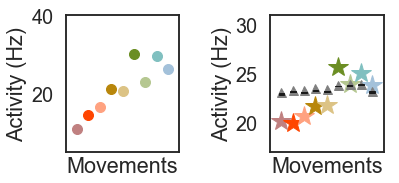

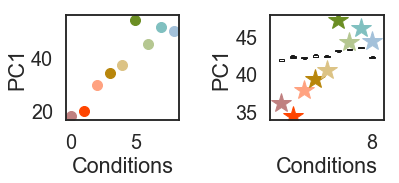

In [45]:
# C -- leave out command predictions 
generalization_plots.plot_loo_n36_eg_lo_command()

Spks shape: 11397, 44
Shuff 0, tm = 0.001
Su Pv grom: 0 = 0.00000
Pop Pv grom: 0 = 0.00000
Spks shape: 6866, 35
Shuff 0, tm = 0.000
Su Pv grom: 1 = 0.00000
Pop Pv grom: 1 = 0.00000
Spks shape: 15451, 148
Shuff 0, tm = 0.000
Su Pv grom: 2 = 0.00000
Pop Pv grom: 2 = 0.00000
Spks shape: 14922, 53
Shuff 0, tm = 0.000
Su Pv grom: 3 = 0.00000
Pop Pv grom: 3 = 0.00000
Spks shape: 11695, 151
Shuff 0, tm = 0.000
Su Pv grom: 4 = 0.00000
Pop Pv grom: 4 = 0.00000
Spks shape: 10900, 42
Shuff 0, tm = 0.000
Su Pv grom: 5 = 0.00000
Pop Pv grom: 5 = 0.00000
Spks shape: 4224, 50
Shuff 0, tm = 0.000
Su Pv grom: 6 = 0.00000
Pop Pv grom: 6 = 0.00000
Spks shape: 5364, 48
Shuff 0, tm = 0.000
Su Pv grom: 7 = 0.00000
Pop Pv grom: 7 = 0.00000
Spks shape: 5134, 48
Shuff 0, tm = 0.000
Su Pv grom: 8 = 0.00000
Pop Pv grom: 8 = 0.00000
SU pooled grom, pv = 0.00000, mn = 1.28024, sh_mn = 1.35541, sh_5th = 1.35495
Pop pooled grom, pv = 0.00000, mn = 14.26845, sh_mn = 15.53650, sh_5th = 15.52889
Spks shape: 8040, 20
Sh

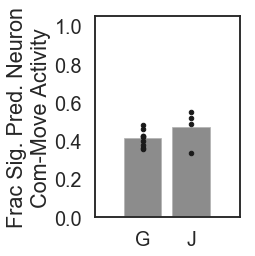

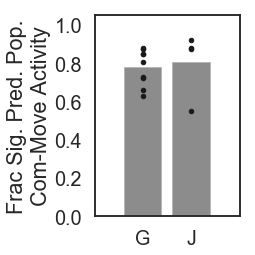

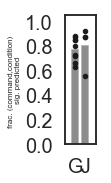

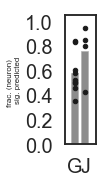

In [46]:
# D -- frac sig predicted 
tmp = generalization_plots.plot_loo_frac_commands_sig(cat = 'com', nshuffs=10, save=True)

##################
Starting Animal grom Day 0
##################
done with left out
r2 of full: 0.3016, r2 of purple LO 0.2984
Animal grom, Day ix 0, pv = 0.00000, purple r2_ = 0.29840, cyan r2_0.30155, shuff = [0.251, 0.252], null_r2 -1.00000
pv null 0.20000
##################
Starting Animal grom Day 1
##################
done with left out
r2 of full: 0.3595, r2 of purple LO 0.3544
Animal grom, Day ix 1, pv = 0.00000, purple r2_ = 0.35440, cyan r2_0.35954, shuff = [0.302, 0.302], null_r2 -1.00000
pv null 0.20000
##################
Starting Animal grom Day 2
##################
done with left out
r2 of full: 0.1254, r2 of purple LO 0.1228
Animal grom, Day ix 2, pv = 0.00000, purple r2_ = 0.12283, cyan r2_0.12538, shuff = [0.086, 0.087], null_r2 -1.00000
pv null 0.20000
##################
Starting Animal grom Day 3
##################
done with left out
r2 of full: 0.1245, r2 of purple LO 0.1221
Animal grom, Day ix 3, pv = 0.00000, purple r2_ = 0.12214, cyan r2_0.12448, shuff = [0.091, 0

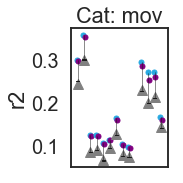

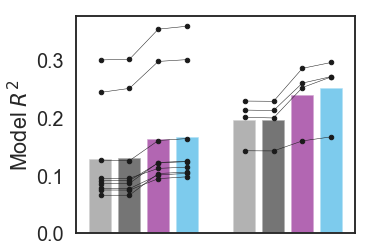

In [48]:
# E - cartoon 
# F condition left out 
cat = 'mov'; 
save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, yval='r2', nshuffs=5, save_bars = True, 
                                                         save_dict=save_dict)
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'com', fig4=False, fig5=False, sfig4_lo_com = False,
                                            sfig4_lo_com_ang = False, sfig4_lo_com_mag = False, sfig4_lo_mov = True)

############ starting vert ##############
Starting grom, Day 0 Mov Cat vert
((64,), (64,), (18, 44), 6, (18,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (18, 44), 6, (18,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (18, 44), 6, (18,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64
((101,), (101,), (40, 44), 6, (40,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((101,), (101,), (40, 44), 6, (40,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((101,), (101,), (40, 44), 6, (40,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 165, total trls in this blk 101
((122,), (122,), (97, 44), 6, (97,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((122,), (122,), (97, 44), 6, (97,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((122,), (122,), (97, 44), 6, (97,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 287, total trls in this blk 122


/Users/preeyakhanna/conda/envs/py27/lib/python2.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


grom, 0: r2 0.315, shuff = [0.256, 0.257], pv = 0.00000
Starting grom, Day 1 Mov Cat vert
((64,), (64,), (51, 35), 6, (51,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (51, 35), 6, (51,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (51, 35), 6, (51,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64
((129,), (129,), (21, 35), 6, (21,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((129,), (129,), (21, 35), 6, (21,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((129,), (129,), (21, 35), 6, (21,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 193, total trls in this blk 129
grom, 1: r2 0.381, shuff = [0.320, 0.321], pv = 0.00000
Starting grom, Day 2 Mov Cat vert
((64,), (64,), (24, 148), 6, (24,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (24, 148), 6, (24,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (24, 148), 6, (24,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64
((255,), (255,), (20, 148), 6, (20,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((255,), (255,), (20, 148), 6, (20,))
[0. 1. 2. 3. 4. 5

jeev, 2: r2 0.270, shuff = [0.222, 0.222], pv = 0.00000
Starting jeev, Day 3 Mov Cat vert
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
(80, (17, 7))
new trial offset 80, total trls in this blk 80
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
(101, (46, 7))
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Keeping JEEV target 2 2.7
Correcting JEEV target 2 -0.4
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 0.1
Correcting JEEV target 2 -0.1
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 -0.9
Correcting JEEV target 2 -0.0
Correcting JEEV target 2 -0.6
Correcting JEEV target 2 -0.3
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
Correcting JEEV target 2 -0.2
new trial offset 176, total trls in this blk 96
jeev, 3: r2 0.177, shuff = [0.152, 0.153], pv = 0.00000
POOLED jeev, r2 0.251, shuff = [0.206, 0.206], pv = 0.00000
############ starting horz ##############
S

REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
new trial offset 358, total trls in this blk 159
jeev, 0: r2 0.309, shuff = [0.256, 0.256], pv = 0.00000
Starting jeev, Day 1 Mov Cat horz
Xlims: -0.05, 0.13
Ylims: 0.05, 0.23
Bin Curson kin Size 20
(16, (38, 7))
new trial offset 16, total trls in this blk 16
Xlims: -0.08, 0.16
Ylims: 0.02, 0.26
Bin Curson kin Size 20
(152, (39, 7))
Len Obs Targs [1 2 3 4 5 6 8 9]
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REMOVING A TRIAL: Animal jeev, TargIx 1.0
REM

((64,), (64,), (47, 50), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (47, 50), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (47, 50), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 156, total trls in this blk 64
grom, 6: r2 0.171, shuff = [0.129, 0.129], pv = 0.00000
Starting grom, Day 7 Mov Cat diag_pos
((64,), (64,), (35, 48), 6, (35,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (35, 48), 6, (35,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (35, 48), 6, (35,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 64, total trls in this blk 64
((100,), (100,), (48, 48), 6, (48,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((100,), (100,), (48, 48), 6, (48,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((100,), (100,), (48, 48), 6, (48,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 164, total trls in this blk 100
grom, 7: r2 0.111, shuff = [0.080, 0.080], pv = 0.00000
Starting grom, Day 8 Mov Cat diag_pos
((64,), (64,), (36, 48), 6, (36,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (36, 48), 6, (36,))
[0. 1. 2. 3. 4. 5

((159,), (159,), (34, 151), 6, (34,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((159,), (159,), (34, 151), 6, (34,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 223, total trls in this blk 159
((121,), (121,), (47, 151), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((121,), (121,), (47, 151), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((121,), (121,), (47, 151), 6, (47,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 344, total trls in this blk 121
grom, 4: r2 0.107, shuff = [0.071, 0.072], pv = 0.00000
Starting grom, Day 5 Mov Cat diag_neg
((63,), (63,), (20, 42), 6, (20,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((63,), (63,), (20, 42), 6, (20,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((63,), (63,), (20, 42), 6, (20,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 63, total trls in this blk 63
((64,), (64,), (12, 42), 6, (12,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (12, 42), 6, (12,))
[0. 1. 2. 3. 4. 5. 6. 7.]
((64,), (64,), (12, 42), 6, (12,))
[0. 1. 2. 3. 4. 5. 6. 7.]
new trial offset 127, total trls in this blk 64
((97,), (97,), (32, 42), 6,

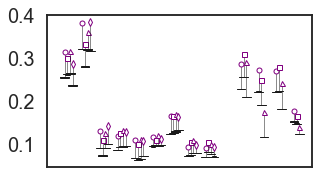

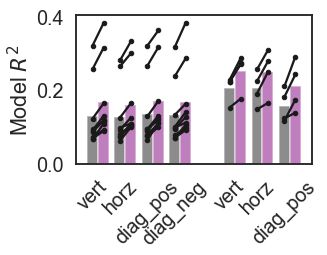

In [49]:
# G - leave out movement 
save_bars = generalization_plots.fit_predict_lomov_model(nshuffs=10)
generalization_plots.plot_loo_bars(save_bars)

mov 1.0, len 25
mov 2.0, len 27
mov 3.0, len 15
mov 10.1, len 34
mov 11.1, len 58
mov 12.1, len 58
mov 13.1, len 90
mov 14.1, len 60
mov 15.0, len 19
pop_mns -- (9, 44)
[10.30942491  3.67602532  0.2654321   0.32330061 10.47461155 19.85500481
 12.78170422  2.22675846  0.14017229  0.10621541  0.         20.34322912
  0.36560388  0.39630882  7.77171297 15.85135646  4.68859818  5.93858006
 12.21918301  5.14582825  5.22402726 12.92551005 13.84461838 14.69076141
  2.93040233  5.02626206 10.02315879 11.19610681  9.64324986  7.06763456
 11.64259305 22.99416764  9.51933005  5.85369222  2.67505563  5.34657064
 21.36424656 16.47637394 27.10518351  6.75586291 21.13401575 13.05170353
  6.62080608 11.5687962 ]
Number of dim 44, number of obs 9


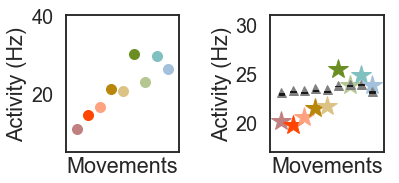

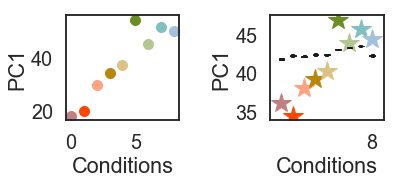

In [50]:
# H - leave out movement prediction
generalization_plots.plot_loo_n36_eg_lo_command(cat = 'mov')

Spks shape: 11397, 44
Shuff 0, tm = 0.000
Su Pv grom: 0 = 0.00000
Pop Pv grom: 0 = 0.00000
Spks shape: 6866, 35
Shuff 0, tm = 0.000
Su Pv grom: 1 = 0.00000
Pop Pv grom: 1 = 0.00000
Spks shape: 15451, 148
Shuff 0, tm = 0.000
Su Pv grom: 2 = 0.00000
Pop Pv grom: 2 = 0.00000
Spks shape: 14922, 53
Shuff 0, tm = 0.000
Su Pv grom: 3 = 0.00000
Pop Pv grom: 3 = 0.00000
Spks shape: 11695, 151
Shuff 0, tm = 0.000
Su Pv grom: 4 = 0.00000
Pop Pv grom: 4 = 0.00000
Spks shape: 10900, 42
Shuff 0, tm = 0.000
Su Pv grom: 5 = 0.00000
Pop Pv grom: 5 = 0.00000
Spks shape: 4224, 50
Shuff 0, tm = 0.000
Su Pv grom: 6 = 0.00000
Pop Pv grom: 6 = 0.00000
Spks shape: 5364, 48
Shuff 0, tm = 0.000
Su Pv grom: 7 = 0.00000
Pop Pv grom: 7 = 0.00000
Spks shape: 5134, 48
Shuff 0, tm = 0.000
Su Pv grom: 8 = 0.00000
Pop Pv grom: 8 = 0.00000
SU pooled grom, pv = 0.00000, mn = 1.27566, sh_mn = 1.35549, sh_5th = 1.35495
Pop pooled grom, pv = 0.00000, mn = 14.19970, sh_mn = 15.53765, sh_5th = 15.53030
Spks shape: 8040, 20
Sh

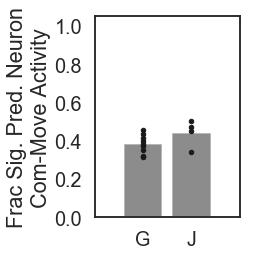

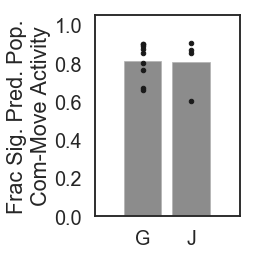

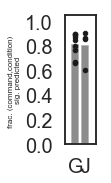

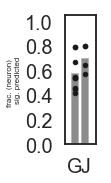

In [51]:
# I - frac sig predicted
tmp = generalization_plots.plot_loo_frac_commands_sig(cat = 'mov', nshuffs=20, save=True)

#### Fig 5

In [21]:
# A/B cartoon

##################
Starting Animal grom Day 0
##################
r2 of full: 0.1939, r2 of purple LO 0.1917
##################
Starting Animal grom Day 1
##################
r2 of full: 0.2313, r2 of purple LO 0.2277
##################
Starting Animal grom Day 2
##################
r2 of full: 0.0811, r2 of purple LO 0.0799
##################
Starting Animal grom Day 3
##################
r2 of full: 0.0737, r2 of purple LO 0.0728
##################
Starting Animal grom Day 4
##################
r2 of full: 0.0771, r2 of purple LO 0.0761
##################
Starting Animal grom Day 5
##################
r2 of full: 0.0495, r2 of purple LO 0.0481
##################
Starting Animal grom Day 6
##################
r2 of full: 0.0878, r2 of purple LO 0.0857
##################
Starting Animal grom Day 7
##################
r2 of full: 0.0572, r2 of purple LO 0.0555
##################
Starting Animal grom Day 8
##################
r2 of full: 0.0529, r2 of purple LO 0.0511
##################
Starting 

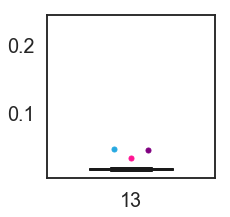

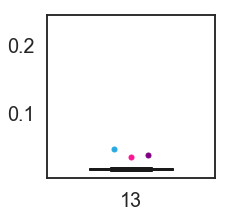

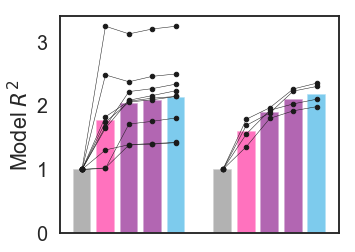

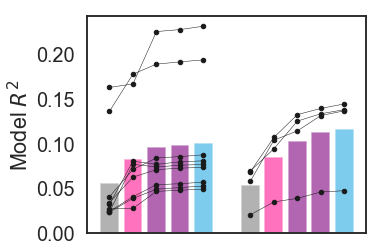

In [26]:
# C -- R2 

## Gather the data inot "save_dict"
save_dict = {}
for cat in ['com', 'mov']:
    save_dict = generalization_plots.plot_dyn_const_r2(cat=cat, nshuffs = 1000,
            model_nm = 'hist_1pos_0psh_0spksm_1_spksp_0', 
                                                         return_trans_from_lo=True, 
                                                         save_dict = save_dict,
                                                         apply_full_axes_to_all = True) # full dimensionality
    other_color = analysis_config.blue_rgb

### Plot the normalized and un-normalized data; 
plot_act = False
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'dyn_const_combo_mov_com_'+str(plot_act)+'normTrue', 
                                             other_color=other_color,
                                             fig4 = False, fig5 = True, shuff_norm = True)

plot_act = False
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'dyn_const_combo_mov_com_'+str(plot_act)+'normFalse', 
                                             other_color=other_color,
                                             fig4 = False, fig5 = True, shuff_norm = False)

In [ ]:
# D 
generalization_plots.r2_by_dyn_axes(dim=10)

##################
Starting Animal grom Day 0
##################
done with estimating null spks
done with left out
r2 of full: 0.3980, r2 of purple LO 0.3948
r2 of null predicting null: 0.0000
Animal grom, Day ix 0, pv = 0.00000, purple r2_ = 0.39480, cyan r2_0.39796, shuff = [0.358, 0.361], null_r2 0.00000
pv null 1.00000
##################
Starting Animal grom Day 1
##################
done with estimating null spks
done with left out
r2 of full: 0.3728, r2 of purple LO 0.3672
r2 of null predicting null: 0.0000
Animal grom, Day ix 1, pv = 0.00000, purple r2_ = 0.36719, cyan r2_0.37278, shuff = [0.340, 0.343], null_r2 0.00000
pv null 1.00000
##################
Starting Animal grom Day 2
##################
done with estimating null spks
done with left out
r2 of full: 0.2984, r2 of purple LO 0.2927
r2 of null predicting null: -0.0000
Animal grom, Day ix 2, pv = 0.00000, purple r2_ = 0.29273, cyan r2_0.29836, shuff = [0.239, 0.242], null_r2 -0.00000
pv null 1.00000
##################
Star

done with estimating null spks
done with left out
r2 of full: 0.2628, r2 of purple LO 0.2456
r2 of null predicting null: -0.0000
Animal jeev, Day ix 2, pv = 0.00000, purple r2_ = 0.24563, cyan r2_0.26284, shuff = [0.230, 0.234], null_r2 -0.00000
pv null 1.00000
##################
Starting Animal jeev Day 3
##################
done with estimating null spks
done with left out
r2 of full: 0.1116, r2 of purple LO 0.0945
r2 of null predicting null: 0.0000
Animal jeev, Day ix 3, pv = 1.00000, purple r2_ = 0.09447, cyan r2_0.11158, shuff = [0.100, 0.102], null_r2 0.00000
pv null 1.00000
Animal POOLED jeev, pv = 0.00000, r2_ purple = 0.193, r2_ cyan = 0.212, shuff = [0.186, 0.188], r2_null -0.000
pv null 1.00000


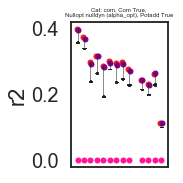

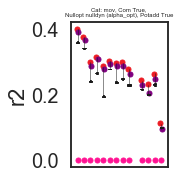

In [34]:
# E -- predict command 
orange = np.array([247, 148, 29])/255.

save_dict = {}
for cat in ['com', 'mov']:
    for plot_act in [True]:#, True]:
        save_dict = generalization_plots.plot_loo_r2_overall(cat=cat, nshuffs = 10,
                model_nm = 'hist_1pos_0psh_0spksm_1_spksp_0', return_trans_from_lo=True, 
                                             plot_action=plot_act, null_opt='nulldyn',
                                                potent_addon=True, nulldyn_opt='alpha_opt',
                                                            save_bars = True,
                                                            save_dict = save_dict)
        if plot_act: 
            other_color = orange
        else:
            other_color = analysis_config.blue_rgb

### Plot normalized (main fig)
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'combo_mov_com_'+str(plot_act)+'normTrue', other_color=other_color,
                                            shuff_norm = True, plot_command=True)

## Plot non-normalized (inset)
generalization_plots.bar_plot_loo_r2_overall(save_dict, 'combo_mov_com_'+str(plot_act)+'normFalse', other_color=other_color,
                                            shuff_norm = False, plot_command=True)

PC stats Animal grom, Day 0, pv = 0.10000, r2 true 0.757, mn shuff 0.639, 95th shuff 0.667
AE stats Animal grom, Day 0, pv = 0.00000, AE true 22.126, mn shuff 26.869, 95th shuff 27.211
ERR: Animal grom, Day 0, pv = 0.00000, mn_err = 3.817, mn_shuf = [4.784, 4.720]
PC stats Animal grom, Day 1, pv = 0.10000, r2 true 0.657, mn shuff 0.427, 95th shuff 0.440
AE stats Animal grom, Day 1, pv = 0.00000, AE true 20.005, mn shuff 28.739, 95th shuff 29.093
ERR: Animal grom, Day 1, pv = 0.00000, mn_err = 4.310, mn_shuf = [5.698, 5.651]
PC stats Animal grom, Day 2, pv = 0.10000, r2 true 0.710, mn shuff 0.503, 95th shuff 0.507
AE stats Animal grom, Day 2, pv = 0.00000, AE true 22.070, mn shuff 32.232, 95th shuff 32.713
ERR: Animal grom, Day 2, pv = 0.00000, mn_err = 7.481, mn_shuf = [10.554, 10.464]
PC stats Animal grom, Day 3, pv = 0.10000, r2 true 0.791, mn shuff 0.599, 95th shuff 0.618
AE stats Animal grom, Day 3, pv = 0.00000, AE true 21.875, mn shuff 28.186, 95th shuff 28.580
ERR: Animal grom, 

{'fracCC': [0.8495575221238938,
  0.8714285714285714,
  0.8647342995169082,
  0.8021978021978022,
  0.893719806763285,
  0.6732283464566929,
  0.9154929577464789,
  0.9032258064516129,
  0.9439252336448598,
  0.7050359712230215,
  0.7066666666666667,
  0.7830188679245284,
  0.6942148760330579],
 'fracCom': [0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  0.84375,
  0.95,
  1.0,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  0.9047619047619048],
 'nCC': [226, 140, 207, 273, 207, 254, 71, 124, 107, 139, 75, 106, 121]}

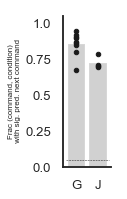

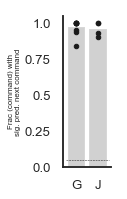

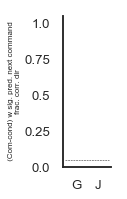

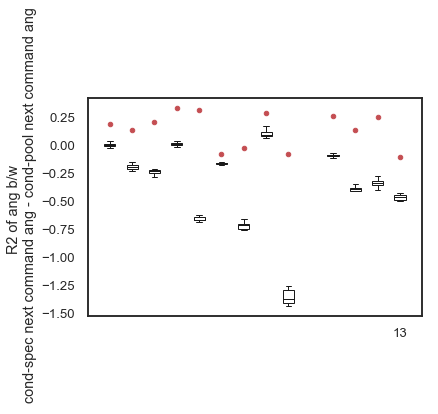

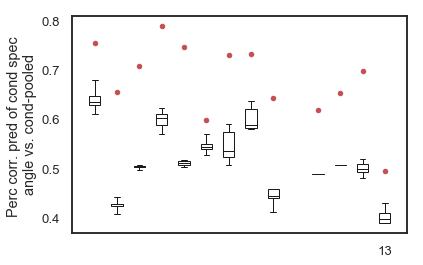

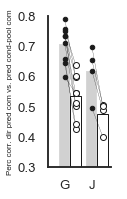

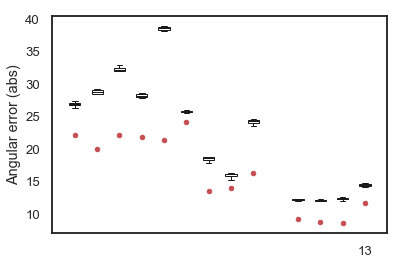

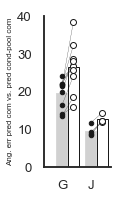

In [39]:
# F / H -- fraction predicted better than shuffle 
from online_analysis import pred_fwd
pred_fwd.frac_next_com_mov_sig(nshuffs=10)

In [ ]:
# G 
plot_fr_diffs.eg_command_PSTH_pred(arrow_scale = .01, width=.01)

#### Fig S5

In [ ]:
# A - cartoon 
# B -- comparison of different models 

In [ ]:
plot_pred_fr_diffs.plot_suppfig4_R2_bars(ridge_norm=True, fraction=True)

In [47]:
# C / D / E -- e.g. nascar
# See "rebuttal_nascar_sims.ipynb"

In [ ]:
# F -- 
# See "rebuttal_train_rslds_plot_model_R2.ipynb"

#### Fig S6

In [ ]:
# A, B, C, D: 
plot_pred_fr_diffs.pw_comparison()

In [ ]:
# E -- cartoon from position subtrajectory 

In [ ]:
# F / G / H 
plot_pred_fr_diffs.neuraldiff_vs_behaviordiff_corr_pairwise_predictions()

In [ ]:
# I / J / K 
pred_fwd.pred_vs_true_next_command()